# Jobsheet 02: Klasifikasi Gambar

## Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

Matplotlib is building the font cache; this may take a moment.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


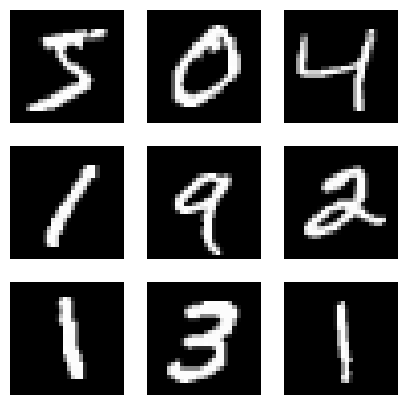

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

## Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_train = x_test.reshape(len(x_test), -1) / 255.0

clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_train_flat)

print("Akurasi:", accuracy_score(y_train, y_pred))

Akurasi: 0.9119


## Praktikum D3: Membangun CNN Sederhana

c:\Users\lenov\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9495 - loss: 0.1751 - val_accuracy: 0.9823 - val_loss: 0.0636
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9816 - loss: 0.0614 - val_accuracy: 0.9850 - val_loss: 0.0574
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9873 - val_loss: 0.0517
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9878 - val_loss: 0.0482
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9882 - val_loss: 0.0456


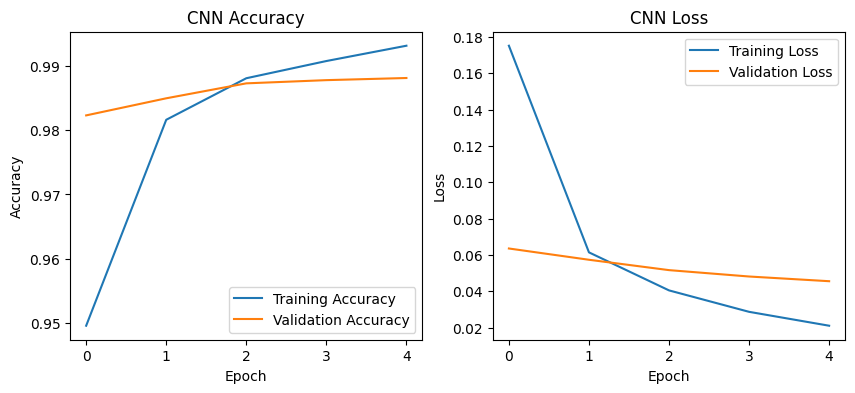

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D4: Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 69s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4602 - loss: 1.5037 - val_accuracy: 0.5762 - val_loss: 1.2057
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5912 - loss: 1.1602 - val_accuracy: 0.6180 - val_loss: 1.1075
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6457 - loss: 1.0209 - val_accuracy: 0.6654 - val_loss: 0.9774
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6771 - loss: 0.9246 - val_accuracy: 0.6604 - val_loss: 0.9797
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7015 - loss: 0.8564 - val_accuracy: 0.6918 - val_loss: 0.9066
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7199 - loss: 0.8013 - val_accuracy: 0.6958 - val_loss: 0.8900
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7391 - loss: 0.7485 - val_accuracy: 0.6814 - val_loss: 0.9432
Epoch 8/10
1407/1407 ━━━━━━━

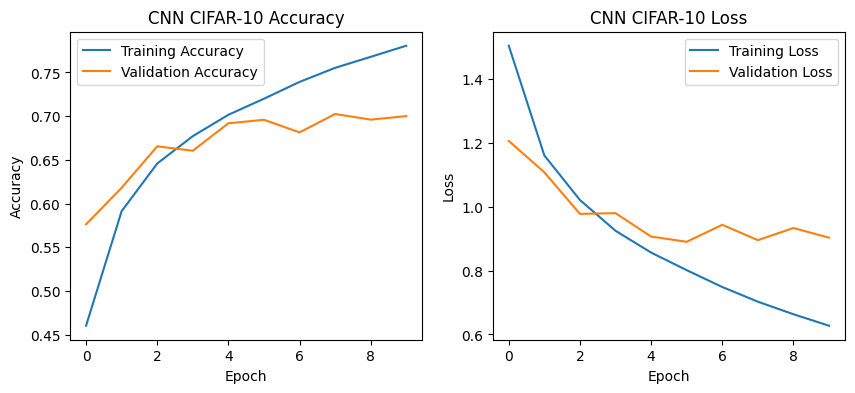

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D5: Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 96s 67ms/step - accuracy: 0.5157 - loss: 1.3927 - val_accuracy: 0.5646 - val_loss: 1.2279
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 97s 69ms/step - accuracy: 0.5806 - loss: 1.2006 - val_accuracy: 0.5888 - val_loss: 1.1705
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 126s 90ms/step - accuracy: 0.5984 - loss: 1.1457 - val_accuracy: 0.5936 - val_loss: 1.1624
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 144s 103ms/step - accuracy: 0.6132 - loss: 1.1054 - val_accuracy: 0.5962 - val_loss: 1.1499
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 104s 74ms/step - accuracy: 0.6250 - loss: 1.0739 - val_accuracy: 0.6112 - val_loss: 1.1152


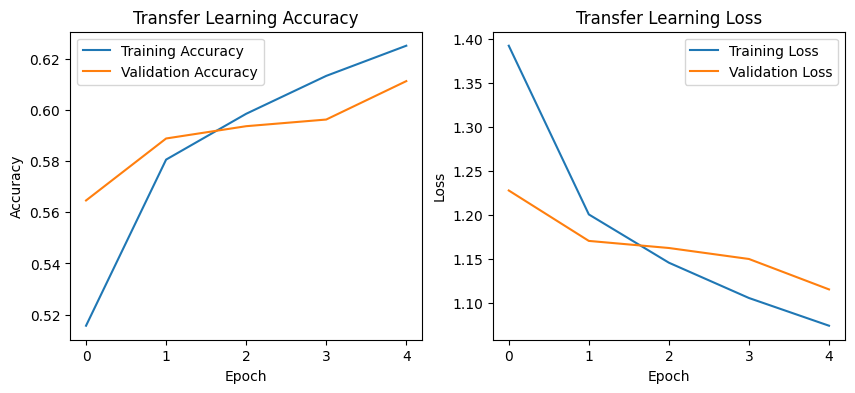

In [6]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## D6: Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1000
           1       0.64      0.69      0.66      1000
           2       0.52      0.49      0.51      1000
           3       0.41      0.48      0.44      1000
           4       0.57      0.48      0.52      1000
           5       0.58      0.45      0.51      1000
           6       0.60      0.68      0.64      1000
           7       0.65      0.68      0.66      1000
           8       0.65      0.77      0.71      1000
           9       0.63      0.58      0.61      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



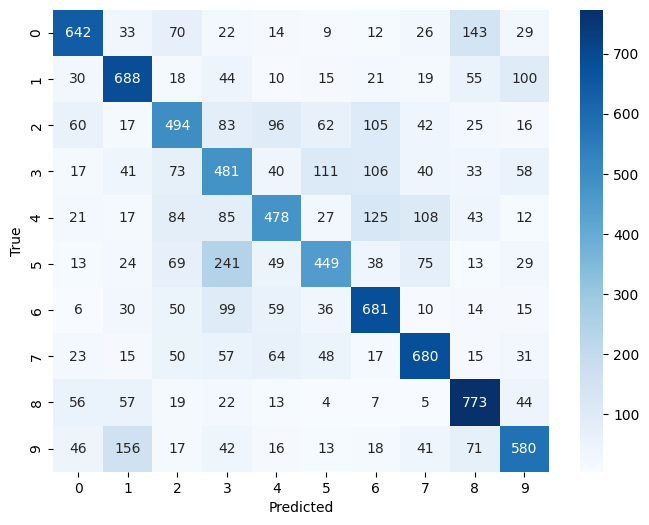

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Tugas Kecil:

### D1
Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

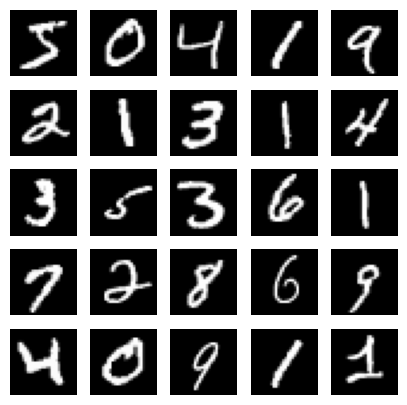

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

### D2
Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap akurasi?

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score


x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_train = x_test.reshape(len(x_test), -1) / 255.0

clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_train_flat)

print("Akurasi:", accuracy_score(y_train, y_pred))

Akurasi: 0.95175


### D3
Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

c:\Users\lenov\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9530 - loss: 0.1541 - val_accuracy: 0.9845 - val_loss: 0.0519
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9850 - loss: 0.0496 - val_accuracy: 0.9873 - val_loss: 0.0457
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9865 - val_loss: 0.0470
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9926 - loss: 0.0246 - val_accuracy: 0.9892 - val_loss: 0.0392
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9912 - val_loss: 0.0310


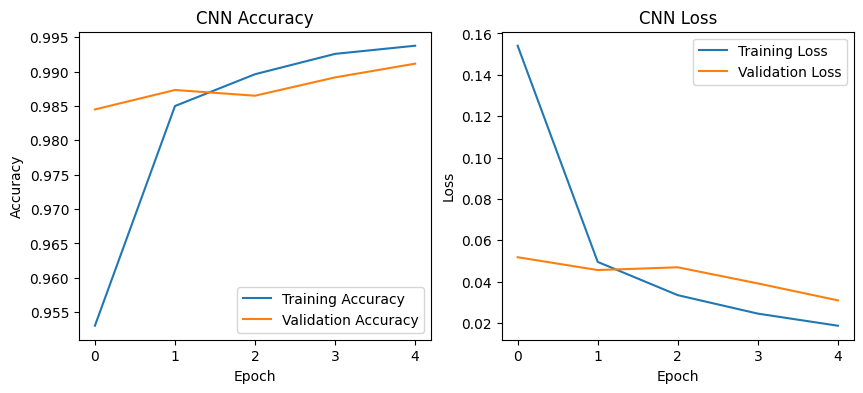

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### D4
Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4442 - loss: 1.5373 - val_accuracy: 0.5578 - val_loss: 1.2747
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5607 - loss: 1.2385 - val_accuracy: 0.6186 - val_loss: 1.0912
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6042 - loss: 1.1315 - val_accuracy: 0.6478 - val_loss: 1.0161
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6282 - loss: 1.0570 - val_accuracy: 0.6714 - val_loss: 0.9463
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6461 - loss: 1.0064 - val_accuracy: 0.6772 - val_loss: 0.9266
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6639 - loss: 0.9589 - val_accuracy: 0.6994 - val_loss: 0.8605
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6727 - loss: 0.9285 - val_accuracy: 0.6986 - val_loss: 0.8658
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6853 - los

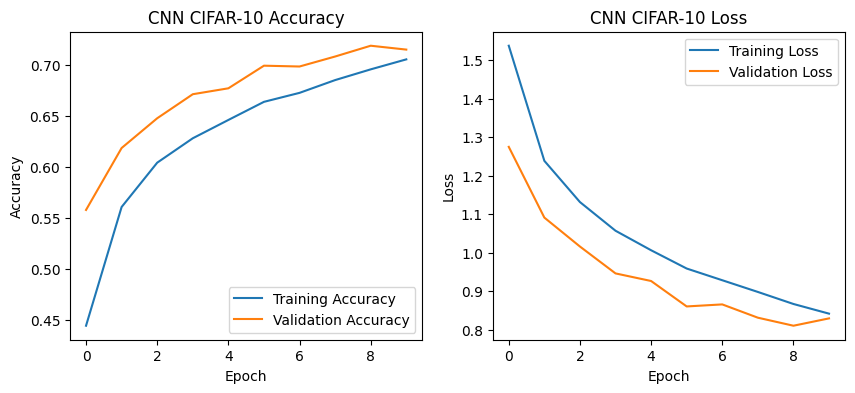

In [11]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### D5
Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 98ms/step - accuracy: 0.5608 - loss: 1.2462 - val_accuracy: 0.6214 - val_loss: 1.0692
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 146s 104ms/step - accuracy: 0.6343 - loss: 1.0459 - val_accuracy: 0.6236 - val_loss: 1.0989
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 169s 120ms/step - accuracy: 0.6568 - loss: 0.9753 - val_accuracy: 0.6470 - val_loss: 1.0086
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 167s 118ms/step - accuracy: 0.6751 - loss: 0.9244 - val_accuracy: 0.6600 - val_loss: 1.0020
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 136s 97ms/step - accuracy: 0.6869 - loss: 0.8827 - val_accuracy: 0.6432 - val_loss: 1.0369


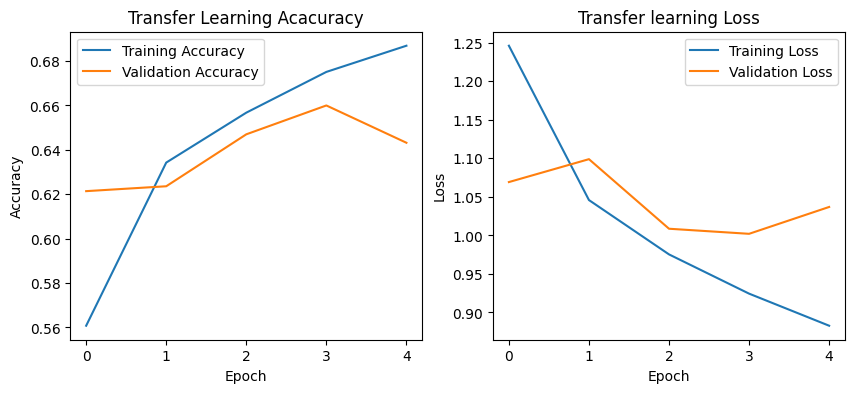

In [12]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

for layer in base_model.layers[-2:]:
  layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Acacuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Tugas Utama

### Load MNIST

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# bikin model CNN sederhana
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# save model
model.save("model_mnist_cnn.h5")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9586 - loss: 0.1361 - val_accuracy: 0.9842 - val_loss: 0.0532
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9872 - val_loss: 0.0404
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9897 - loss: 0.0310 - val_accuracy: 0.9913 - val_loss: 0.0335
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9927 - loss: 0.0227 - val_accuracy: 0.9903 - val_loss: 0.0367
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9900 - val_loss: 0.0363


### Pre-processing & Uji Coba

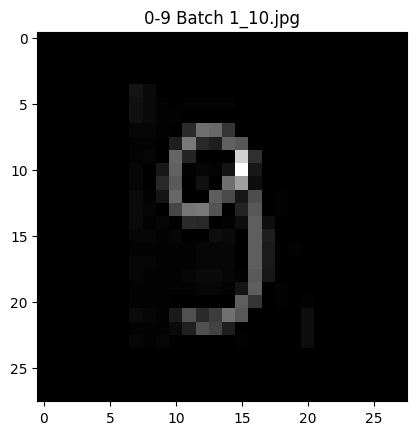

0-9 Batch 1_10.jpg → Prediksi: 2 (prob: 0.124)


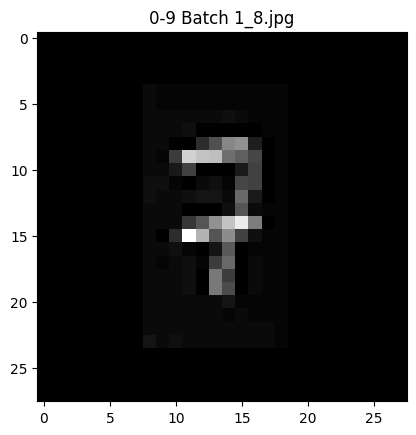

0-9 Batch 1_8.jpg → Prediksi: 3 (prob: 0.134)


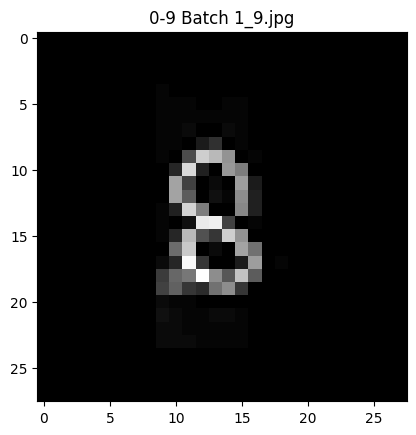

0-9 Batch 1_9.jpg → Prediksi: 2 (prob: 0.124)


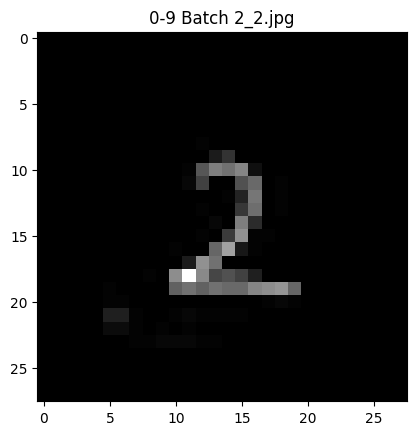

0-9 Batch 2_2.jpg → Prediksi: 2 (prob: 0.131)


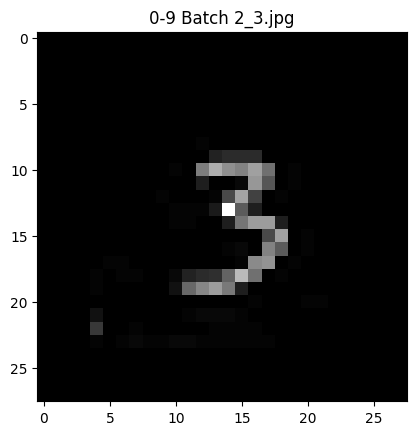

0-9 Batch 2_3.jpg → Prediksi: 3 (prob: 0.131)


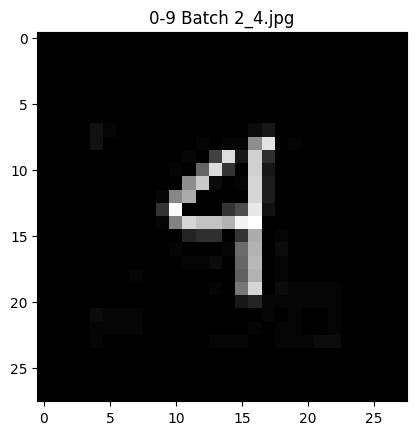

0-9 Batch 2_4.jpg → Prediksi: 1 (prob: 0.126)


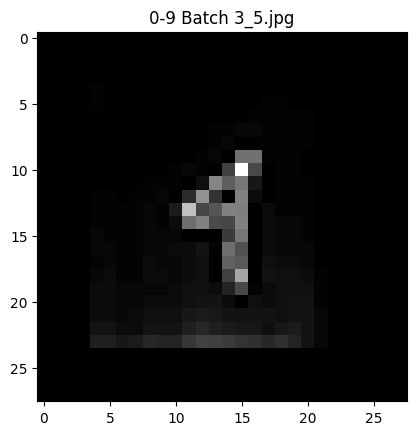

0-9 Batch 3_5.jpg → Prediksi: 1 (prob: 0.137)


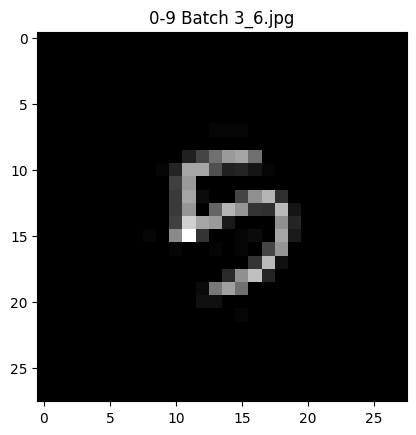

0-9 Batch 3_6.jpg → Prediksi: 1 (prob: 0.123)


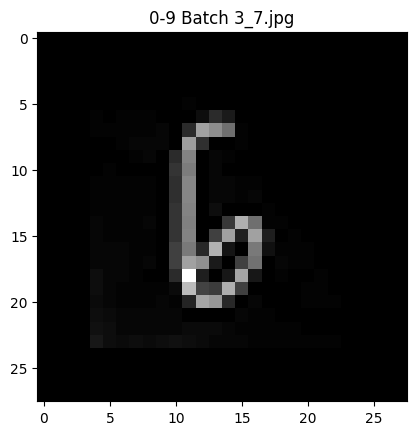

0-9 Batch 3_7.jpg → Prediksi: 6 (prob: 0.159)


In [8]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import glob

# -------------------
# Fungsi preprocessing
# -------------------
def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')                
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    if arr.mean() > 127:                      
        img = ImageOps.invert(img)
        arr = np.array(img)

    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w,h = img.size

    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    arr = np.array(canvas).astype('float32')/255.0
    return canvas, arr.reshape(28,28,1)

# -------------------
# Load model
# -------------------
# Kalau CNN (Keras)
from tensorflow import keras
model = keras.models.load_model("model_mnist_cnn.h5")

# Kalau SVM (sklearn)
# import joblib
# clf = joblib.load("svm_mnist.pkl")

# -------------------
# Prediksi semua file PNG/JPG di folder ini
# -------------------
for fn in glob.glob("*.png") + glob.glob("*.jpg"):
    img = Image.open(fn)
    disp, x = preprocess_to_mnist_28x28(img)

    plt.imshow(disp, cmap='gray')
    plt.title(fn)
    plt.show()

    # ==== CNN ====
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = np.argmax(probs)
    conf = np.max(probs)
    print(f"{fn} → Prediksi: {pred} (prob: {conf:.3f})")

    # ==== SVM ====
    # x_flat = x.reshape(-1, 784)
    # pred = clf.predict(x_flat)[0]
    # print(f"{fn} → Prediksi: {pred}")